In [1]:
from scipy import special
import numpy as np
import matplotlib.pyplot as plt
from math import factorial


In [2]:
x_max = 10
x_min = -x_max
dx = 0.01

x = np.arange(x_min,x_max+dx,dx)

# Initialize matrix to store evaluated polynomials
N = 11
eval_pols_exact = np.zeros((N,np.size(x)))
eval_pols_scipy = np.zeros((N,np.size(x)))
eval_pols_test1 = np.zeros((N,np.size(x)))
eval_pols_test2 = np.zeros((N,np.size(x)))


In [3]:
eval_pols_exact[0]  = 1
eval_pols_exact[1]  = 2*x
eval_pols_exact[2]  = 4*x**2 - 2
eval_pols_exact[3]  = 8*x**3 - 12*x
eval_pols_exact[4]  = 16*x**4 - 48*x**2 + 12
eval_pols_exact[5]  = 32*x**5 - 160*x**3 + 120*x
eval_pols_exact[6]  = 64*x**6 - 480*x**4 + 720*x**2 - 120
eval_pols_exact[7]  = 128*x**7 - 1344*x**5 + 3360*x**3 - 1680*x
eval_pols_exact[8]  = 256*x**8 - 3584*x**6 + 13440*x**4 - 13440*x**2 + 1680
eval_pols_exact[9]  = 512*x**9 - 9216*x**7 + 48384*x**5 - 80640*x**3 + 30240*x
eval_pols_exact[10] = 1024*x**10 - 23040*x**8 + 161280*x**6 - 403200*x**4 + 302400*x**2 - 30240


In [4]:
%%time
for n in range(N):
    H = special.hermite(n)
    eval_pols_scipy[n] = H(x)


CPU times: total: 0 ns
Wall time: 6.29 ms


In [5]:
%%time
for n in range(N):
    pol = 0
    
    for m in range(n//2 + 1):
        pol += (-1)**m / (factorial(m) * factorial(n - 2*m)) * (2*x)**(n - 2*m)
    
    eval_pols_test1[n] = factorial(n) * pol


CPU times: total: 15.6 ms
Wall time: 2.81 ms


In [6]:
%%time
eval_pols_test2[0] = 1
eval_pols_test2[1] = 2*x

for n in range(2,N):
    eval_pols_test2[n] = 2*x*eval_pols_test2[n-1] - 2*n*eval_pols_test2[n-2]


CPU times: total: 0 ns
Wall time: 0 ns


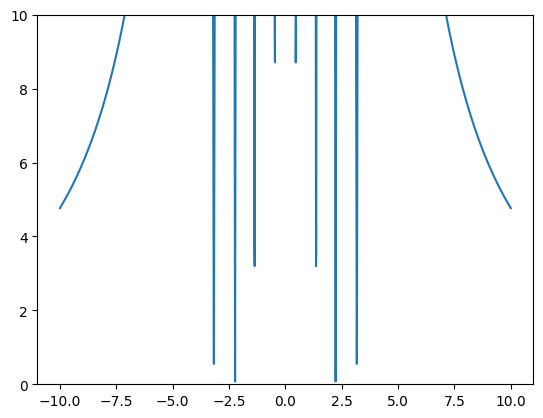

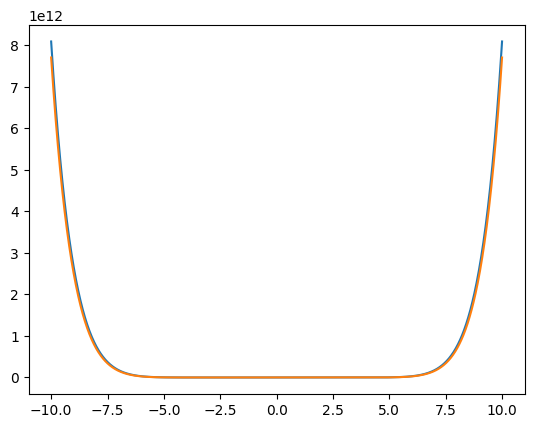

In [34]:
i = 10

plt.plot(x,np.abs((eval_pols_exact[i] - eval_pols_test2[i]) / eval_pols_exact[i]) * 100)
plt.ylim([0,10])
plt.show()

plt.plot(x,eval_pols_exact[i])
plt.plot(x,eval_pols_test2[i])
plt.show()


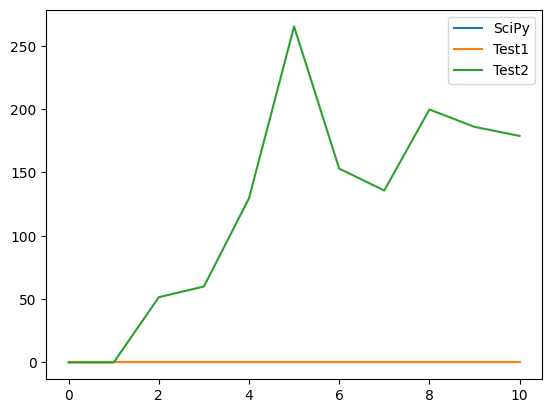

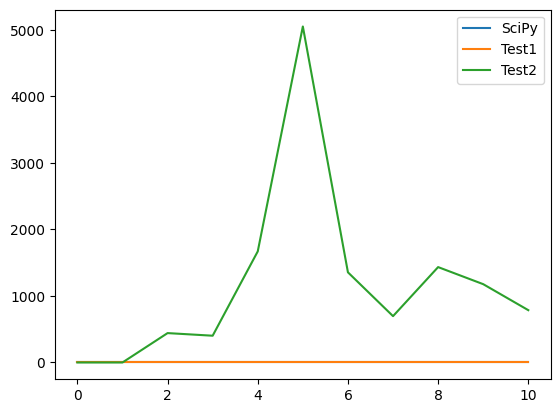

In [7]:
mean_error_scipy = np.zeros(N)
mean_error_test1 = np.zeros(N)
mean_error_test2 = np.zeros(N)

std_error_scipy = np.zeros(N)
std_error_test1 = np.zeros(N)
std_error_test2 = np.zeros(N)

for i in range(N):
    mean_error_scipy[i] = np.mean(np.abs((eval_pols_exact[i] - eval_pols_scipy[i]) / eval_pols_exact[i]) * 100)
    mean_error_test1[i] = np.mean(np.abs((eval_pols_exact[i] - eval_pols_test1[i]) / eval_pols_exact[i]) * 100)
    mean_error_test2[i] = np.mean(np.abs((eval_pols_exact[i] - eval_pols_test2[i]) / eval_pols_exact[i]) * 100)

    std_error_scipy[i] = np.std(np.abs((eval_pols_exact[i] - eval_pols_scipy[i]) / eval_pols_exact[i]) * 100)
    std_error_test1[i] = np.std(np.abs((eval_pols_exact[i] - eval_pols_test1[i]) / eval_pols_exact[i]) * 100)
    std_error_test2[i] = np.std(np.abs((eval_pols_exact[i] - eval_pols_test2[i]) / eval_pols_exact[i]) * 100)

    

plt.plot(np.arange(N),mean_error_scipy, label='SciPy')
plt.plot(np.arange(N),mean_error_test1, label='Test1')
plt.plot(np.arange(N),mean_error_test2, label='Test2')
plt.legend()
plt.show()

plt.plot(np.arange(N),std_error_scipy, label='SciPy')
plt.plot(np.arange(N),std_error_test1, label='Test1')
plt.plot(np.arange(N),std_error_test2, label='Test2')
plt.legend()
plt.show()
